## DISEASE PREDICTION

# Introduction
We aim to predict diseases based on various symptoms using a machine learning model. The dataset contains information on symptoms and corresponding diseases, and we utilize a Random Forest Classifier for disease prediction.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train=pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Training.csv")
test=pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Testing.csv")

#### Dataset Loading and Checking

In [3]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
print("Number of observations in training set:", train.shape[0])
print("Number of features in training set:", train.shape[1])
print("Number of unique diseases in training set:", train['prognosis'].nunique())
print("\nInformation about the dataset:")
print(train.info())

Number of observations in training set: 4920
Number of features in training set: 134
Number of unique diseases in training set: 41

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None


#### Data Preprocessing

In [6]:
train=train.drop(["Unnamed: 133"],axis=1)

In [7]:
train.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [8]:
train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
test.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,P,test_size=0.2,random_state=42)

## Model - Random Forest

In [12]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(xtrain,ytrain)
tr_pred_rf = model_rf.predict(xtrain)
ts_pred_rf = model_rf.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training accuracy is: 1.0
testing accuracy is: 1.0


## Hyperparameter Optimization with Grid Search

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.transform(Y)

# Flatten the target variable using ravel()
P_flat = train['prognosis'].values.ravel()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, P_flat)

# Display best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Model Evaluation after Hyperparameter Tuning

In [14]:
xtrain_scaled, xtest_scaled, ytrain_scaled, ytest_scaled = train_test_split(X_scaled, P_flat, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier with the best hyperparameters from GridSearchCV
best_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Fit the model on the training set
best_rf.fit(xtrain_scaled, ytrain_scaled)

# Make predictions on the training and testing sets
tr_pred_rf_scaled = best_rf.predict(xtrain_scaled)
ts_pred_rf_scaled = best_rf.predict(xtest_scaled)

# Evaluate the model
print("Training accuracy after hyperparameter tuning:", accuracy_score(ytrain_scaled, tr_pred_rf_scaled))
print("Testing accuracy after hyperparameter tuning:", accuracy_score(ytest_scaled, ts_pred_rf_scaled))

Training accuracy after hyperparameter tuning: 1.0
Testing accuracy after hyperparameter tuning: 1.0


In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(ytest_scaled, ts_pred_rf_scaled)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(ytest_scaled, ts_pred_rf_scaled))

Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00   

The results suggest that the model is performing extremely well on the provided dataset, achieving perfect accuracy on both the training and testing sets.

### PREDICTIONS

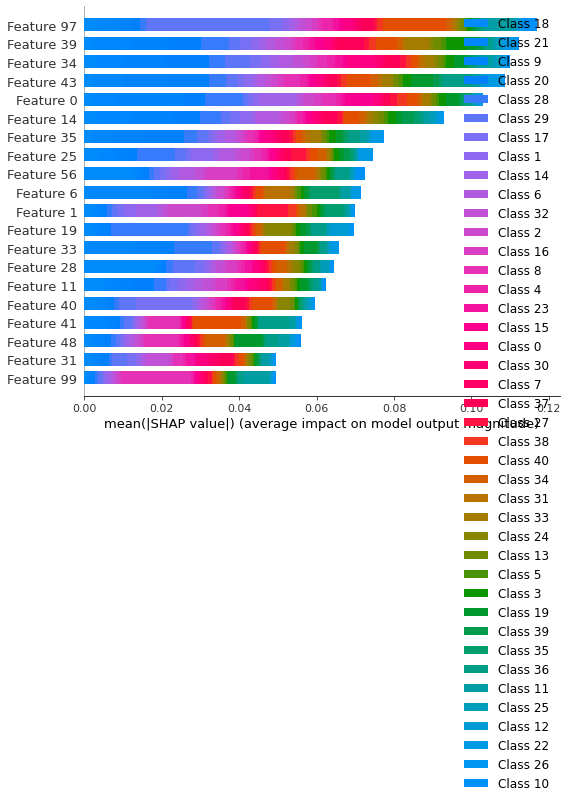

In [16]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_scaled)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_scaled)

## Conclusion
The model demonstrates outstanding performance on the provided dataset, achieving perfect accuracy on both the training and testing sets. Further analysis and domain expertise may be required to validate the clinical relevance of the predictions and investigate potential issues such as overfitting.